In [151]:
train_file_path= r"C:\Users\acer\Desktop\new project\machine_learning_project\housing\artifact\data_ingestion\2022-10-14-14-25-18\ingested_data\train\housing.csv"

In [152]:
import pandas as pd


In [153]:
df=pd.read_csv(train_file_path )

In [154]:
df.shape

(16512, 10)

In [155]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [156]:
x,y=df.drop(columns=["median_house_value"],axis=1),df[["median_house_value"]]

In [157]:
x.shape

(16512, 9)

In [158]:
y.shape

(16512, 1)

In [159]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [160]:
x.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [161]:
from sklearn.impute import SimpleImputer

In [162]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [163]:
 simple_imputer=SimpleImputer(strategy="median")

In [164]:
numerical_columns=df.drop(columns=["ocean_proximity"],axis=1)

In [165]:
simple_imputer.fit_transform(numerical_columns)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  7.0600e+02,
         2.1736e+00,  7.2100e+04],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  7.6800e+02,
         6.3373e+00,  2.7960e+05],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  3.0000e+02,
         2.8750e+00,  8.2700e+04],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  1.7200e+02,
         3.1797e+00,  1.4040e+05],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  5.0100e+02,
         4.1964e+00,  2.5810e+05],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  1.9700e+02,
         3.1319e+00,  6.2700e+04]])

In [166]:
 df=simple_imputer.transform(numerical_columns)

In [167]:
simple_imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

In [168]:
simple_imputer.statistics_

array([-1.18510e+02,  3.42600e+01,  2.90000e+01,  2.11900e+03,
        4.33000e+02,  1.16400e+03,  4.08000e+02,  3.54155e+00,
        1.79500e+05])

In [169]:
x.longitude.median()

-118.51

In [170]:
x.ocean_proximity.value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [171]:
simple_imputer=SimpleImputer(strategy="most frequent")

In [172]:
simple_imputer.fit_transform(ocean_proximity)

NameError: name 'ocean_proximity' is not defined

In [173]:
from sklearn.base import BaseEstimator , TransformerMixin

In [174]:
class Test(BaseEstimator,TransformerMixin):
    def __init__(self,strategy="median"):

        self.strategy = strategy

    def fit(self,x):
        self.features=x.columns
        self.statistics_=[]
        for coluun in x.columns:
            self.statistics_.append(x[column].mdeain())
        return self
            
    def transform(self,x:pd.DataFrame):
        for idx,column in enumerate(x.columns):
            x[column].fillna(self.statistics[idx])
            return x
    
    

In [175]:
COLUMN_TOTAL_ROOMS= "total_rooms"
COLUMN_POPULATION="population"
COLUMN_HOUSEHOLDS="households"
COLUMN_TOTAL_BEDROOM= "total_bedrooms"




class FeatureGenerator(BaseEstimator, TransformerMixin):



    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise  e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise e            


In [176]:
for idx,column in enumerate(x.columns):
    print(idx,column)

0 longitude
1 latitude
2 housing_median_age
3 total_rooms
4 total_bedrooms
5 population
6 households
7 median_income
8 ocean_proximity


In [177]:
arr1=np.arange(10)
arr2=np.arange(10)

In [178]:
import numpy as np

In [179]:
np.c_[arr1,arr2]

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]])

In [180]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
num_pipeline= Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ('feature_generator',FeatureGenerator()),
    ('scaling',StandardScaler())
])

In [183]:
from sklearn.preprocessing import OneHotEncoder

In [184]:
cat_pipeline=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ('oneHotEndcoder',OneHotEncoder()),
    ("scaling",StandardScaler(with_mean=False))

])

In [185]:
df=pd.read_csv(train_file_path)

In [186]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [187]:
num_column_name =['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'
       ]

cat_column_name=["ocean_proximity"]       

In [188]:
preprocessing= ColumnTransformer([
    ('num_pipeline',num_pipeline,num_column_name),
    ('cat_pipeline',cat_pipeline,cat_column_name)

])

In [189]:
 train_df=preprocessing.fit_transform(df)

In [190]:
import dill

In [191]:
with open('preprocessing.pkl', 'wb') as prep_file:
    dill.dump(preprocessing,prep_file)

In [192]:
with open('preprocessing.pkl', "rb") as file_obj:
    preprocessing_loaded_obj=dill.load(file_obj)

In [193]:
test_file_path=r"C:\Users\acer\Desktop\new project\machine_learning_project\housing\artifact\data_ingestion\2022-10-14-14-25-18\ingested_data\test\housing.csv"

In [194]:
 test_df=pd.read_csv(test_file_path)

In [214]:
 test_arr=preprocessing_loaded_obj.transform(test_df)

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
x=train_df

In [201]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [199]:
 y=np.array(df.median_house_value)

In [200]:
lr= LinearRegression()

In [202]:
lr.fit(x,y)

LinearRegression()

In [205]:
lr.fit_intercept

True

In [203]:
lr.coef_

array([-5.56496234e+04, -5.67118195e+04,  1.37346438e+04, -1.94312573e+03,
        7.34311979e+03, -4.57092702e+04,  4.54534055e+04,  7.47141304e+04,
        6.60458107e+03,  1.04304139e+03,  9.24830579e+03,  7.74522433e+13,
        7.26927412e+13,  1.71683239e+12,  4.91715439e+13,  5.22296162e+13])

In [206]:
lr.intercept_

-156005188559518.3

In [208]:
 y_hat=lr.predict(x)

In [209]:
import matplotlib.pyplot as plt

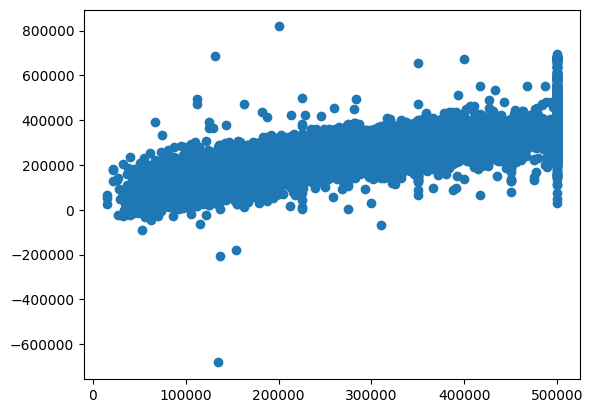

In [211]:
plt.plot(y, y_hat,"o")

In [212]:
from sklearn.metrics import r2_score

In [213]:
r2_score(y, y_hat)

0.6481553502128934

In [215]:
yhat_test= lr.predict(test_arr)

In [216]:
y_test= np.array(test_df.median_house_value)

In [217]:
r2_score(y_test,yhat_test)

0.6564586978134341